In [44]:
!pip install -Uqq fastbook ipywidgets nbdev

import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
# your drive home will be at /content/gdrive/MyDrive/
# your notebooks might be at /content/gdrive/MyDrive/Colab Notebooks/
BASE_DIR = "/content/gdrive/MyDrive/Colab Notebooks/"

Mounted at /content/gdrive


In [2]:
print(f'MNIST url: {URLs.MNIST_SAMPLE}')
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()
(path/'train').ls()
(path/'train'/'3').ls()
(path/'valid'/'7').ls().sorted()[0:5]

MNIST url: https://s3.amazonaws.com/fast-ai-sample/mnist_sample.tgz


(#5) [Path('/root/.fastai/data/mnist_sample/valid/7/0.png'),Path('/root/.fastai/data/mnist_sample/valid/7/1006.png'),Path('/root/.fastai/data/mnist_sample/valid/7/1012.png'),Path('/root/.fastai/data/mnist_sample/valid/7/1021.png'),Path('/root/.fastai/data/mnist_sample/valid/7/1039.png')]

In [3]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
im3_path = threes[1]
print(f'im3_path: {im3_path}')
im3 = Image.open(im3_path)
im3

im3_path: /root/.fastai/data/mnist_sample/train/3/10000.png


In [4]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [5]:
im3_t[0:15, 0:22]
def foo(**args):
  for key in args:
    print(f'key: {key}, val: {args[key]}')
foo(**{'age': 23, 'name': 'joe'})

key: age, val: 23
key: name, val: joe


In [6]:
im7_t = tensor(Image.open(sevens[0]))
len(im7_t), im7_t.shape, im7_t.ndim

(28, torch.Size([28, 28]), 2)

<Axes: >

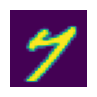

In [7]:
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
# three_tensors & seven_tensors are python lists of 2D tensors, not 3D tensors
len(three_tensors), three_tensors[0].shape, three_tensors[0].ndim
len(seven_tensors), seven_tensors[0].shape, seven_tensors[0].ndim
show_image(seven_tensors[1])

In [8]:
# https://pytorch.org/docs/stable/generated/torch.stack.html
# doc(torch.stack)
a = [tensor([2, 2, 2], [1, 1, 1]), tensor([3, 3, 3], [4, 4, 4])]
print(f'shape of first tensor in the python list: {a[0].shape}')
print(f'''shapes after different torch.stack() calls:
          {torch.stack(a, 0).shape},
          {torch.stack(a, 1).shape},
          {torch.stack(a, 2).shape}''')
torch.stack(a, 0),  torch.stack(a, 1), torch.stack(a, 2)

shape of first tensor in the python list: torch.Size([2, 3])
shapes after different torch.stack() calls:
          torch.Size([2, 2, 3]),
          torch.Size([2, 2, 3]),
          torch.Size([2, 3, 2])


(tensor([[[2, 2, 2],
          [1, 1, 1]],
 
         [[3, 3, 3],
          [4, 4, 4]]]),
 tensor([[[2, 2, 2],
          [3, 3, 3]],
 
         [[1, 1, 1],
          [4, 4, 4]]]),
 tensor([[[2, 3],
          [2, 3],
          [2, 3]],
 
         [[1, 4],
          [1, 4],
          [1, 4]]]))

In [9]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
len(stacked_threes), stacked_threes.ndim, stacked_threes.shape, len(stacked_sevens), stacked_sevens.ndim, stacked_sevens.shape

(6131, 3, torch.Size([6131, 28, 28]), 6265, 3, torch.Size([6265, 28, 28]))

<Axes: >

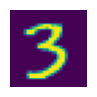

In [10]:
# pd.DataFrame(stacked_threes[1][4:35, 4:35]).style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')
show_image(stacked_threes[1])

<Axes: >

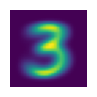

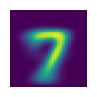

In [11]:
mean3 = stacked_threes.mean(0)
show_image(mean3)
mean7 = stacked_sevens.mean(0)
show_image(mean7)

In [12]:
# L1 norm or mean absolute error
(stacked_threes[0] - mean3).abs().mean()
(stacked_sevens[0] - mean7).abs().mean()
def is_3(x): return (x - mean3).abs().mean((1,2)) < (x - mean7).abs().mean((1,2)).float()
is_3(stacked_threes).shape, is_3(stacked_sevens).shape, is_3(stacked_threes)[0:5]

# map() operations like these are extremely slow on large datasets,
# prefer doing broadcast operations supported by numpy, pytorch, tf, etc.
# def accuracy(t):
  # return tensor(L(torch.unbind(t, 0)).map(is_3)).float().mean()

is_3(stacked_threes).float().mean(), tensor(1.0) - is_3(stacked_sevens).float().mean()

(tensor(0.8912), tensor(0.9962))

In [13]:
t = Tensor([[[1,2,3], [4,5,6]],
            [[7,7,7], [8,8,8]]])
Tensor(L(torch.unbind(t, 0)).map(lambda x: len(x))).mean()

tensor(2.)

In [14]:
# https://pytorch.org/docs/stable/generated/torch.mean.html
# ??torch.mean
t = Tensor([[[1,2,3], [4,5,6]],
            [[7,7,7], [8,8,8]]])
t.shape

(t.flatten().mean(), t.mean(), t.mean(0), t.mean(1), t.mean(2), t.mean((0,1)),
 t.mean((1,0)),t.mean((1,2)), t.mean((2,0)), t.mean((-1, -2)))

(tensor(5.5000),
 tensor(5.5000),
 tensor([[4.0000, 4.5000, 5.0000],
         [6.0000, 6.5000, 7.0000]]),
 tensor([[2.5000, 3.5000, 4.5000],
         [7.5000, 7.5000, 7.5000]]),
 tensor([[2., 5.],
         [7., 8.]]),
 tensor([5.0000, 5.5000, 6.0000]),
 tensor([5.0000, 5.5000, 6.0000]),
 tensor([3.5000, 7.5000]),
 tensor([4.5000, 6.5000]),
 tensor([3.5000, 7.5000]))

In [15]:
valid_threes = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_sevens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_threes.shape, valid_sevens.shape

accuracy_3s = is_3(valid_threes).float().mean()
accuracy_7s = 1 - is_3(valid_sevens).float().mean()
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9436), tensor(0.9815), tensor(0.9625))

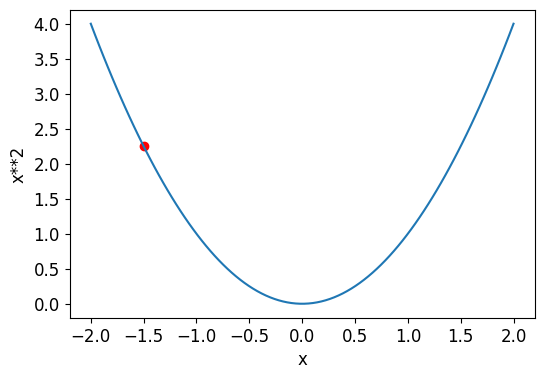

In [16]:
def f(x): return x**2
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5,f(-1.5), color='red')

In [17]:
xt1 = tensor(3.).requires_grad_()
yt = f(xt1)
xt1, yt
yt.backward()
xt1.grad

xt2 = tensor(4.).requires_grad_()
yt = f(xt2)
xt2, yt
yt.backward()
xt2.grad

xt1 = tensor(3.).requires_grad_()
xt2 = tensor(4.).requires_grad_()
def f2(x, y): return 3 * x**2 + 4 * y + 7
yt = f2(xt1, xt2)
yt.backward()
print(xt1.grad, xt2.grad)

def f3(x, y): return 5 * x**2 + 2 * y + 7
yt = f3(xt1, xt2)
yt.backward()
print(xt1.grad, xt2.grad)

xt = tensor([3., 5., 7., 13.]).requires_grad_()
def f4(x): return (x**2).sum()
yt = f4(xt)
yt.backward()
xt.grad

tensor(18.) tensor(4.)
tensor(48.) tensor(6.)


tensor([ 6., 10., 14., 26.])

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])


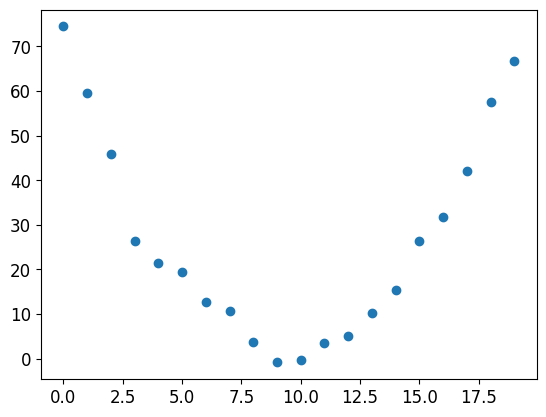

In [18]:
# roller-coaster example

# Training data:
# input: time, label: speed
time = torch.arange(0, 20).float()
print(time)
speeds = torch.randn(20) * 3 + 0.75 * (time - 9.5)**2 + 1
plt.scatter(time, speeds)

In [19]:
# model (quadratic function)
# experiment changing this function e.g. return a * (t**2) + b or a * (t**3) + b * (t**2) + c
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

# loss function
# try mean absolute and mean squared error methods
# return ((pred - speed)**2).mean()
def loss(pred, speed):
  return ((pred - speed)**2).mean()

t = torch.arange(0, 20).float()
print(t)
a = tensor(1.).requires_grad_()
# doesn't work, uses references:
# b = a, c = a
b = tensor(1.).requires_grad_()
c = tensor(1.).requires_grad_()
speed_pred = f(t[6], (a,b,c))
print(t[6], speed_pred)
speed_pred.backward()
a.grad, b.grad, c.grad

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])
tensor(6.) tensor(43., grad_fn=<AddBackward0>)


(tensor(36.), tensor(6.), tensor(1.))

In [20]:
def show_preds(preds, ax=None):
  if ax is None: ax = plt.subplots()[1]
  ax.scatter(time, speeds)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300, 100)

a, b, c: tensor([-1.6053], requires_grad=True), tensor([0.2325], requires_grad=True), tensor([2.2399], requires_grad=True)
pred 1: tensor([   2.2399,    0.8671,   -3.7163,  -11.5102,  -22.5146,  -36.7296,  -54.1552,  -74.7913,  -98.6379, -125.6952, -155.9629, -189.4412, -226.1301, -266.0295, -309.1395, -355.4600, -404.9911,
        -457.7327, -513.6849, -572.8477])
to_np: [   2.23987      0.8670795   -3.7162638  -11.5101595  -22.514608   -36.729607   -54.155167   -74.79127    -98.63793   -125.69515   -155.9629    -189.44122   -226.1301    -266.02954   -309.1395
 -355.46002   -404.99112   -457.73273   -513.68494   -572.84766  ]
loss: (0, tensor(83689.0469, grad_fn=<MeanBackward0>))
loss: (1, tensor(16375.2842, grad_fn=<MeanBackward0>))
loss: (2, tensor(3637.4641, grad_fn=<MeanBackward0>))
loss: (3, tensor(1227.0758, grad_fn=<MeanBackward0>))
loss: (4, tensor(770.9530, grad_fn=<MeanBackward0>))
loss: (5, tensor(684.6372, grad_fn=<MeanBackward0>))
loss: (6, tensor(668.3003, grad_fn=<MeanB

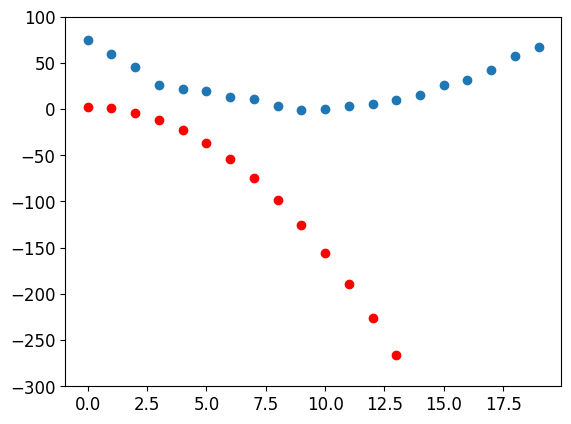

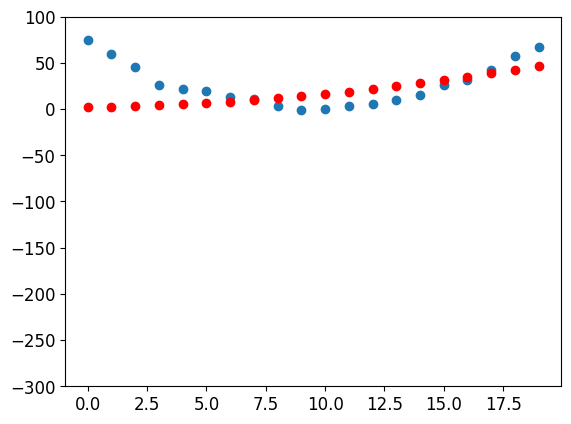

In [21]:
# try initialising with different values
# torch.randn(3).requires_grad_()
g = torch.Generator()
g.manual_seed(4)
a, b, c = (torch.randn(1, generator=g).requires_grad_(),
          torch.randn(1, generator=g).requires_grad_(),
          torch.randn(1, generator=g).requires_grad_())
print(f'a, b, c: {a}, {b}, {c}')
pred1 = f(time, (a.data, b.data, c.data))
print(f'pred 1: {pred1}')
print(f'to_np: {to_np(pred1)}')
show_preds(pred1)

# try different values of lr to see how fast/slow the change in loss `l` is
# lr = 0.0000001 # too slow a step, loss should barely change in each iteration, might require a large number of iterations through the entire training set to minimize loss which could result in overfitting
# lr = 0.01 # too big a step, loss should not go down at all, might oscillate among high loss values
lr = 0.00001
def apply_step(i, params, prn=False):
  a, b, c = params
  preds = f(time, params)
  l = loss(preds, speeds)
  if((i % 1 == 0) and prn):
    print(f'loss: {(i,l)}')
  l.backward()
  # params.data = params.data - (params.grad.data * lr)
  # params.grad = None
  a.data = a.data - (a.grad.data * lr)
  b.data = b.data - (b.grad.data * lr)
  c.data = c.data - (c.grad.data * lr)
  a.grad = b.grad = c.grad = None
  return preds

for i in range(10):
  apply_step(i, (a, b, c), True)

print(f'pred 2: {apply_step(5, (a, b, c))}')
show_preds(apply_step(6, (a, b, c)))

a: tensor([0.1055]), b: tensor([0.3407]), c: tensor([2.2493])


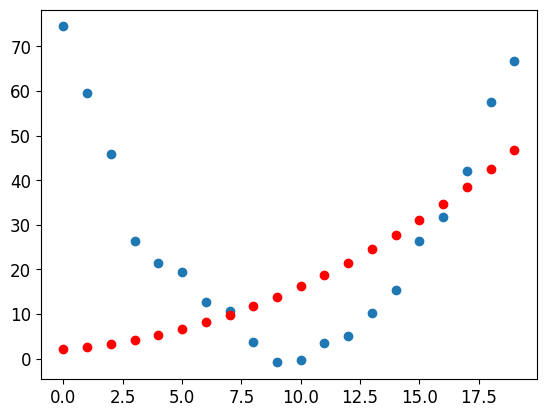

In [22]:
print(f'a: {a.data}, b: {b.data}, c: {c.data}')
plt.scatter(time, speeds)
plt.scatter(time, to_np(f(time, (a, b, c))), color='red')

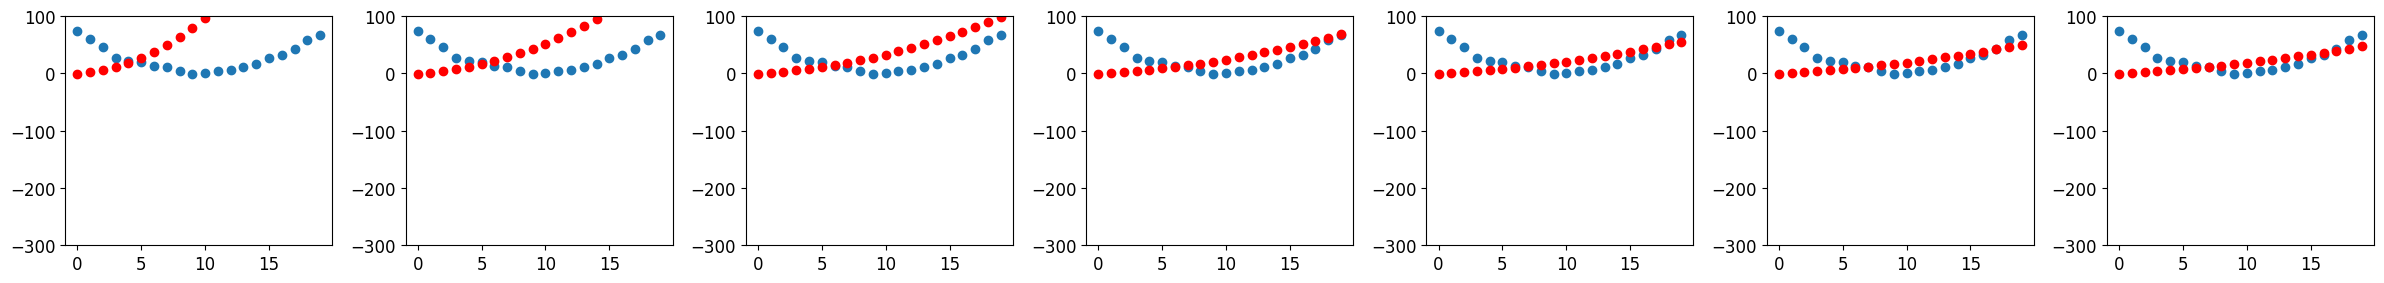

In [23]:
a, b, c = (torch.randn(1, generator=g).requires_grad_(),
          torch.randn(1, generator=g).requires_grad_(),
          torch.randn(1, generator=g).requires_grad_())

_, axs = plt.subplots(1, 7, figsize=(24,3))
for ax in axs: show_preds(apply_step(1, (a, b, c)), ax)
plt.tight_layout()

In [24]:
# Do the same as above roller-coaster example for MNIST problem
# Note: This is the wrong way, see the other notebook

def filesToTensors(d1, d2):
  t = [tensor(Image.open(f)) for f in (path/d1/d2).ls()]
  return torch.stack(t, 0).float()/255

# 1. Dataset
path = untar_data(URLs.MNIST_SAMPLE)

train_3s = filesToTensors('train', '3')
train_7s = filesToTensors('train', '7')
valid_3s = filesToTensors('valid', '3')
valid_7s = filesToTensors('valid', '7')

In [43]:
# 2. model
mean3 = train_3s.mean()
mean7 = train_7s.mean()

def distance(t, mean):
  return (t - mean).abs().mean((1,2))

def is_3(t):
  return (distance(t, mean3) < distance(t, mean7)).float()

# 3. loss
def loss_fn(t1, t2, params):
  m1 = t1*params
  print(f'm1 in loss(): {m1[0:2,0:2]}')
  m1m = (distance(m1, mean3) < distance(m1, mean7))
  print(f'm1m in loss(): {m1m}')
  #m1m.backward()
  res = ((1 - is_3(t1*params).mean()) + is_3(t2*params).mean()) / 2
  print(f'res in loss(): {res}')
  return res

# 4. initialise weights
params = torch.randn(28, 28, requires_grad=True)
print(f'params: {params[0]}, init: {params.grad}, {params.is_leaf}')
# 5. learning rate
lr = 0.000001

# 6. one step of gradient descent
def apply_step(i, params, prn=False):
  loss = loss_fn(train_3s, train_7s, params)
  #print(f'loss: {loss}')
  #print(f'before: {params.grad}, {params.is_leaf}')
  params.retain_grad()
  #print(f'before: {params.grad}, {params.is_leaf}')
  #loss.backward()
  #print(f'after: {params.grad}')
  # params.data = params.data - (params.grad.data * lr)
  params.grad = None
  #if(i % 10 == 0): print(loss)

# 7. n steps of gradient descent
for i in range(1):
  apply_step(i, params, True)


params: tensor([-0.6663,  0.8110,  0.6464, -0.9256,  1.0445,  0.4454, -0.3803, -1.3759,  0.4827,  0.8935,  0.1561, -0.1262,  1.1409,  1.2216, -0.3593, -0.2699,  0.4306, -1.2839, -0.8400,  0.2010, -0.8113,
         0.9143,  1.3887,  0.7111, -0.6738,  0.2736, -1.4430,  0.8324], grad_fn=<SelectBackward0>), init: None, True
m1 in loss(): tensor([[[-0., 0., 0., -0., 0., 0., -0., -0., 0., 0., 0., -0., 0., 0., -0., -0., 0., -0., -0., 0., -0., 0., 0., 0., -0., 0., -0., 0.],
         [0., -0., 0., 0., 0., 0., -0., 0., -0., 0., -0., -0., 0., 0., -0., 0., -0., -0., 0., 0., 0., -0., -0., -0., -0., 0., 0., -0.]],

        [[-0., 0., 0., -0., 0., 0., -0., -0., 0., 0., 0., -0., 0., 0., -0., -0., 0., -0., -0., 0., -0., 0., 0., 0., -0., 0., -0., 0.],
         [0., -0., 0., 0., 0., 0., -0., 0., -0., 0., -0., -0., 0., 0., -0., 0., -0., -0., 0., 0., 0., -0., -0., -0., -0., 0., 0., -0.]]], grad_fn=<SliceBackward0>)
m1m in loss(): tensor([False, False, False,  ..., False, False, False])
res in loss(): 0.5


In [ ]:
# * is not matrix multiplication but normal broadcasting or one-to-one multiplication
a = torch.ones(2, 4)
b = torch.ones(2, 4)
c = a + b
d = c + a
e = c * d
print(f'c: {c}, d: {d}, e: {e}')

In [ ]:
a, b, c = (torch.randn(1).requires_grad_(),
          torch.randn(1).requires_grad_(),
          torch.randn(1).requires_grad_())
a.is_leaf, a.grad